In [1]:
import numpy as np
from numpy.linalg import eig
from numpy.linalg import inv,pinv
import pandas as pd
import csv
from collections import defaultdict
from functools import partial
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.optimize as opt

In [30]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold
    
def sigmoid(z):
    return 1/(1+np.exp(-z))


def getZ(x, theta):
    return np.dot(x, theta.T)

def getCost(theta, X, y, lmbda):
    m = len(y)
    sigma = sigmoid(getZ(X, theta))
    positive_loss = np.multiply(y, np.log(sigma))
    negative_loss = np.multiply(1 - y, np.log(1 - sigma))
    return -np.mean(positive_loss + negative_loss)

def getGradients(theta, X, y, lmbda):
    m = len(y)
    temp = sigmoid(getZ(X, theta)) - y
# #     temp = np.dot(temp.T, X).T / m
    return (1 / m) * np.dot(X.T, temp)
#     return temp


def gradientDescent(theta, X, y, lr=0.1, maxIter=5000):
    currentCost = getCost(theta, X, y, 1)
    currentGradient = getGradients(theta, X, y, 1)
    previousCost = currentCost
    costs = [currentCost]
#     print(f'iteration: -1')
    
    for iteration in range(maxIter):
        theta -= lr*currentGradient
        currentGradient = getGradients(theta, X, y, 1)
        currentCost = getCost(theta, X, y, 1)
        costs.append(currentCost)
#         print(f'iteration: {iteration}')
        
        if abs(currentCost) < 0.001:
            print("das")
            break
        
    return costs, theta
        

In [31]:
with open('digits.csv', 'r') as csvfile:
    digitDataset = np.asarray(list(csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)))
    
x = digitDataset[:, :-1]
y = digitDataset[:, -1:]
print("x: ", x.shape)
print("y: ", y.shape)
print(np.unique(y))
m = y.shape[0]
ones = np.ones((m,1))
X = np.hstack((ones, x)) #add the intercept
(m,n) = X.shape

x:  (1797, 64)
y:  (1797, 1)
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


0
das
1


/home/hasan/Installations/miniconda3/envs/AML/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
/home/hasan/Installations/miniconda3/envs/AML/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in multiply


2
das
3
4
das
5
6
7
8
9


98.72008903728437

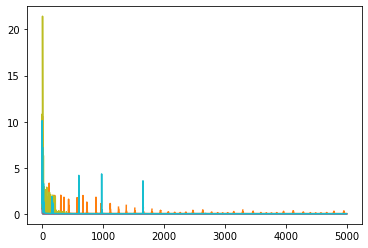

In [32]:
lmbda = 0.1
k = 10
theta = np.zeros((k,n)) #inital parameters
for i in range(k):
    digit_class = i
    print(digit_class)
#     theta[i] = opt.fmin_cg(f = getCost, x0 = theta[i],  fprime = getGradients, args = (X, (y == digit_class).flatten(), lmbda), maxiter = 50)
    costs, theta[i] = gradientDescent(theta[i], X, (y == digit_class).flatten())
#     print(costs[:50])
    plt.plot(costs)
    
pred = np.argmax(X @ theta.T, axis = 1)
# pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100
# print(pd.DataFrame(np.vstack((y.flatten(), pred)).T))